In [1]:
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from tqdm.autonotebook import tqdm
#import pandas as pd
import mysql.connector
import codecs
codecs.register(lambda name: codecs.lookup('utf8') if name == 'utf8mb4' else None)
import re

In [2]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='pruned_commits_db2',
  charset='utf8mb4')

cur = db.cursor()

In [3]:
def yield_c():
    cur.execute('SELECT aggr_rel_pairs.id_relation, examples_bi.idx_diff \
    FROM examples_bi JOIN aggr_rel_pairs ON aggr_rel_pairs.id = examples_bi.id_rel_pair;')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()

In [3]:
from collections import defaultdict

In [5]:
stats = defaultdict(lambda: defaultdict(int))

In [6]:
for pair in tqdm(yield_c()):
    stats[pair[0]][pair[1]] += 1

In [15]:
stats2 = {int(rel): {int(i):stats[rel][i] for i in stats[rel]} for rel in stats}

In [21]:
list(range(-5, 5))

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [22]:
stats3 = {
    rel: [stats[rel][i] for i in range(-100, 101)]
    for rel in stats
}

In [31]:
import pandas as pd

In [33]:
len(data)

412260134

In [17]:
json.dump(stats2, open('relation_stats.json', 'w'), ensure_ascii=False)

In [3]:
import json

In [4]:
cur.execute('SELECT id, relation_name FROM relations;')
rels = cur.fetchall()
rels = {i[0]:i[1] for i in rels}

In [5]:
stats = json.load(open('relation_stats.json'))

In [6]:
stats2 = {int(rel): {int(i):stats[rel][i] for i in stats[rel]} for rel in stats}

In [7]:
data = [[] for i in rels]
for rel in tqdm(stats2):
    for key in stats2[rel]:
        if abs(key) <= 15:
            data[rel-1].extend([-key]*stats2[rel][key])

In [8]:
rel_labels = [rels[key] for key in sorted(rels)]

In [9]:
len(data), len(rel_labels)

(49, 49)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
bar_data = []
for row in data:
    bar_data.append([len(row)])

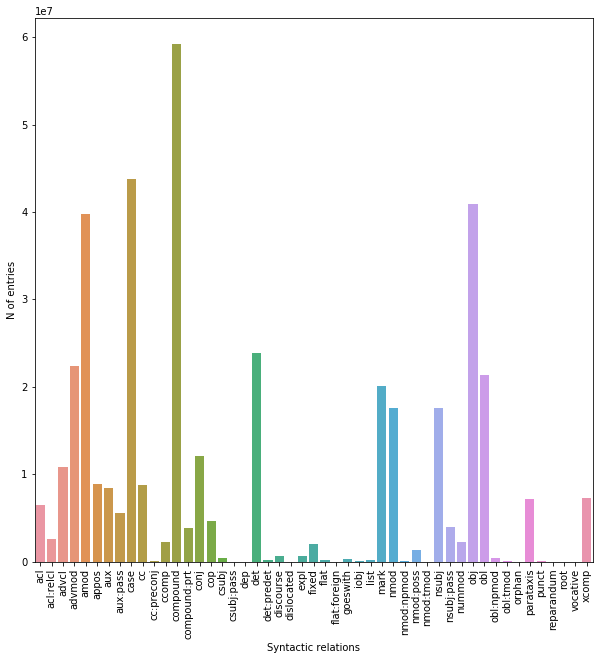

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=bar_data)
plt.xticks(plt.xticks()[0], rel_labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N of entries')
plt.xlabel('Syntactic relations');

In [13]:
for key, i in enumerate(data):
    print(key+1, rel_labels[key], len(i))

1 acl 6525696
2 acl:relcl 2591185
3 advcl 10864251
4 advmod 22412465
5 amod 39802630
6 appos 8907632
7 aux 8476414
8 aux:pass 5553420
9 case 43739940
10 cc 8779072
11 cc:preconj 130074
12 ccomp 2225824
13 compound 59208198
14 compound:prt 3845250
15 conj 12081367
16 cop 4697851
17 csubj 481420
18 csubj:pass 0
19 dep 0
20 det 23886556
21 det:predet 184465
22 discourse 655482
23 dislocated 0
24 expl 658819
25 fixed 2019576
26 flat 158312
27 flat:foreign 2279
28 goeswith 351499
29 iobj 69698
30 list 241245
31 mark 20064606
32 nmod 17534126
33 nmod:npmod 58624
34 nmod:poss 1393544
35 nmod:tmod 8951
36 nsubj 17539854
37 nsubj:pass 3972006
38 nummod 2240641
39 obj 40968701
40 obl 21307636
41 obl:npmod 462438
42 obl:tmod 121442
43 orphan 0
44 parataxis 7220764
45 punct 60708
46 reparandum 16
47 root 0
48 vocative 12669
49 xcomp 7248733


Text(0.5, 0, 'Relative position')

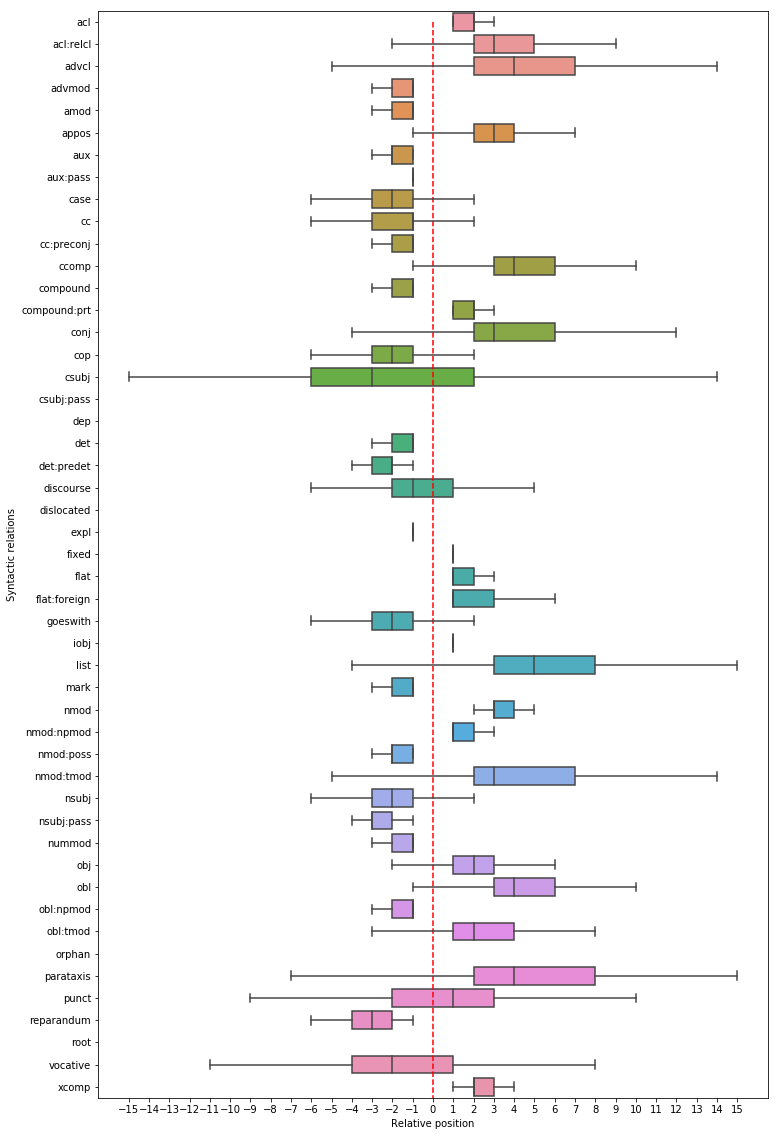

In [14]:
fig, ax = plt.subplots(figsize=(12, 20))
sns.boxplot(data=data, showfliers=False, orient="h")
plt.yticks(plt.yticks()[0], rel_labels);
plt.xticks(list(range(-15, 16)));
#ax.tick_params(axis='y', rotation=90);
plt.vlines(0, 0, 49, colors=['red'], linestyles='dashed')
plt.ylabel('Syntactic relations')
plt.xlabel('Relative position')